# Collect Data

In [11]:
from sklearn.datasets import fetch_openml
import pandas as pd

# fetch data through api
mnist = fetch_openml('mnist_784', version = 1, cache = True)

# split into features and target
X = mnist['data']
y = mnist['target']

In [12]:
# what data types do we have?
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


Now that we know what types of objects we are working with, working with the data should be easier since I am pretty familiar with the available methods.

In [13]:
# shape?
X.shape

(70000, 784)

In [14]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# let's visualize the 10th row, arbitrarily
example = X.iloc[10].values.reshape(28,28)

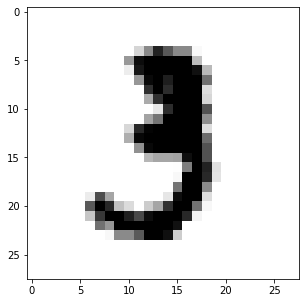

In [16]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns

fig, axs = plt.subplots(1,1)
fig.set_size_inches(5,5)

plt.imshow(example, cmap = mpl.cm.binary)

plt.show()

The digit above looks like a 3. Let's verify that it is a three by looking at the 10th label.

In [17]:
print(y.iloc[10])

3


## Preprocessing

One of the ways we can deal with this problem is by scaling the features so that the pixel intensity is a value from 0-1 instead of 0-256. We will apply that to the entire dataset and we will test how applying a threshold would affect the digits.

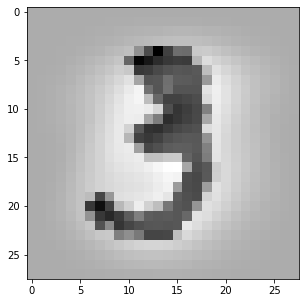

In [27]:
# scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_tr = pd.DataFrame(scaler.fit_transform(X))

fig, axs = plt.subplots(1,1)
fig.set_size_inches(5,5)

example_tr = X_tr.iloc[10].values.reshape(28,28)
plt.imshow(example_tr, cmap = mpl.cm.binary)

plt.show()

In [33]:
# drop pixels if below a threshold
row_means = X.mean(axis = 1)
threshold = row_means.max()
print(threshold)

101.3813775510204


In [42]:
X_dropout = X.applymap(lambda x: 0 if x < threshold else 1)

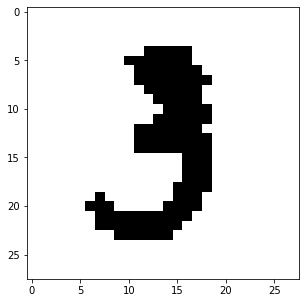

In [35]:
fig, axs = plt.subplots(1,1)
fig.set_size_inches(5,5)

example_dropout = X_dropout.iloc[10].values.reshape(28,28)
plt.imshow(example_dropout, cmap = mpl.cm.binary)

plt.show()

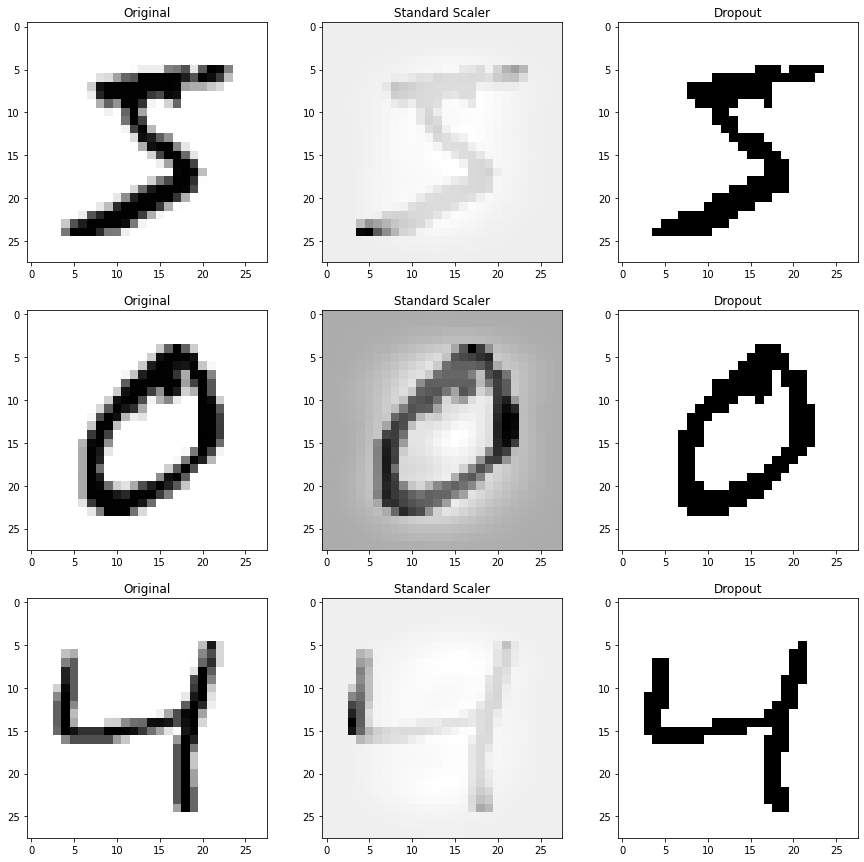

In [43]:
# plot differences side by side for 3 different digits

fig, axs = plt.subplots(3,3)
fig.set_size_inches(15,15)

original_examples = X.iloc[:3]
scaled_examples = X_tr.iloc[:3]
dropout_examples = X_dropout.iloc[:3]

for ind in range(3):
    axs[ind][0].imshow(original_examples.iloc[ind].values.reshape(28,28), cmap= mpl.cm.binary)
    axs[ind][0].title.set_text('Original')

    axs[ind][1].imshow(scaled_examples.iloc[ind].values.reshape(28,28), cmap = mpl.cm.binary)
    axs[ind][1].title.set_text('Standard Scaler')

    axs[ind][2].imshow(dropout_examples.iloc[ind].values.reshape(28,28), cmap = mpl.cm.binary)
    axs[ind][2].title.set_text('Dropout')

plt.show()